In [20]:
! pip install -q girth --upgrade

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Задание №1

Сравните разные методы оценки параметров. Для этого сгенерируйте данные согласно модели 2PL. На полученных данных сравните результаты действия методов совместного максимального правдоподобия (JML) и маргинального максимального правдоподобия (MML). Для этого посчитайте среднее смещение (bias) и квадратный корень из средней ошибки оценивания (RMSE) для оцениваемых параметров. Какой метод оценки параметров и в каких случаях более предпочтителен и почему?


In [22]:
from girth import twopl_mml
from girth import twopl_jml
from girth import grm_mml
from girth import ability_mle

from girth.synthetic import create_synthetic_irt_dichotomous
from girth.synthetic import create_synthetic_irt_polytomous

In [23]:
discrimination = np.random.rand(30) 
difficulty = np.linspace(-2.5, 2.5, 30)
theta = np.random.randn(500)

syn_data = create_synthetic_irt_dichotomous(difficulty, 
                                            discrimination, 
                                            theta)
syn_data

array([[1, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1]])

In [24]:
estimates_mml = twopl_mml(syn_data)
estimates_mml

{'Discrimination': array([0.24566991, 0.20000342, 1.22193329, 1.0042212 , 1.08906382,
        0.22536695, 0.24932743, 0.20000342, 0.25659512, 0.33594941,
        0.55803001, 0.57158892, 0.91740674, 0.40933617, 0.74091856,
        0.27162115, 0.31986847, 0.50615435, 1.21097722, 0.7192485 ,
        0.59082808, 0.20000342, 0.48152275, 0.79591301, 0.8156996 ,
        1.06005688, 0.80479942, 0.39783009, 0.4928533 , 0.24976883]),
 'Difficulty': array([-2.70292947, -4.37344134, -1.49192422, -1.63046603, -1.59549124,
         0.03589717, -1.99334563, -0.08087721, -1.01959912, -0.58905978,
        -0.55738321, -0.62286323, -0.43608646, -0.42803004, -0.34086888,
         0.30006337,  0.28217119,  0.65885094,  0.47591994,  0.74565826,
         1.47634874,  0.64726287,  1.56867939,  1.4290581 ,  1.71173905,
         1.36039244,  2.03036143,  3.05535998,  0.79829506,  1.71610181]),
 'Ability': array([-1.12995143, -1.33059785, -0.4746493 ,  0.79184346,  0.81254388,
         0.20229794, -0.37602022, 

In [25]:
'mean Ability MML: %s' % np.mean(estimates_mml['Ability'] - theta)

'mean Ability MML: -0.02307578425174075'

In [26]:
estimates_jml = twopl_jml(syn_data)
estimates_jml

{'Discrimination': array([0.29135782, 0.25      , 1.95129523, 1.36283782, 1.49869739,
        0.25      , 0.25      , 0.25      , 0.29984645, 0.39616952,
        0.69095475, 0.71168348, 1.25003836, 0.45939961, 0.97040805,
        0.30982194, 0.37329482, 0.5804011 , 2.23630334, 0.93619171,
        0.72611478, 0.25      , 0.56865871, 0.98564702, 0.99764021,
        1.42500615, 0.92898913, 0.45625692, 0.5991422 , 0.27273218]),
 'Difficulty': array([-2.29040336, -3.51556684, -1.12837511, -1.31173899, -1.28301664,
         0.0323113 , -1.98762711, -0.06511972, -0.87746365, -0.50451021,
        -0.46389969, -0.51637606, -0.35082271, -0.38498062, -0.27720726,
         0.26364743,  0.243414  ,  0.58108402,  0.33033344,  0.59919233,
         1.2334566 ,  0.52027651,  1.34862705,  1.2020495 ,  1.45641134,
         1.103444  ,  1.80501399,  2.68823968,  0.6686783 ,  1.57442021])}

In [27]:
abil_jml = ability_mle(syn_data, 
                       estimates_jml['Difficulty'], 
                       estimates_jml['Discrimination'])

'mean Ability JML: %s' % np.mean(abil_jml - theta)

'mean Ability JML: -0.023640174639139488'

In [28]:
rmse = lambda x, y: np.sqrt(np.mean((x - y) ** 2))
bias = lambda x, y: np.average(y - x)

In [29]:
print("RMSE Ability JML: ", rmse(abil_jml, theta))
print("RMSE Ability MML: ", rmse(estimates_mml['Ability'], theta))

RMSE Ability JML:  0.6673714972527328
RMSE Ability MML:  0.621939983914363


In [30]:
print("BIAS Ability JML: ", bias(abil_jml, theta))
print("BIAS Ability MML: ", bias(estimates_mml['Ability'], theta))

BIAS Ability JML:  0.023640174639139488
BIAS Ability MML:  0.02307578425174075


## Вывод: 
1. MML лучше, чем JML 
2. JML хуже в случае заданий с чрезвычайной сложностью или параметрами дискриминации при маленькой выборке

# Задание №2

Проведите исследование одной из политомических моделей - GRM или GPCM. Для фиксированных (но допустимых) значений параметров заданий найдите информацию Фишера для уровня подготовленности. В качестве метода оценивания рекомендуется использовать MML.

In [41]:
diffi = np.sort(np.random.rand(30, 10), axis=1)
discr = np.random.rand(30)
inffi = []
theta = np.linspace(-6, 6, 30)

for t in theta:
    data = create_synthetic_irt_polytomous(diffi, 
                                           discr, 
                                           np.asarray([t]))
    estimates = grm_mml(data)
    
    inffi.append(
        1 / (rmse(estimates['Ability'], t) ** 2)
    )


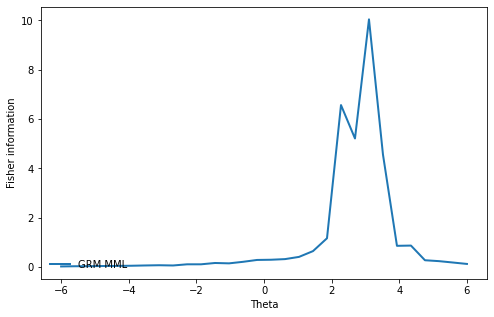

In [42]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 5)

ax.plot(theta, inffi, linewidth=2.0, label='GRM MML')

ax.set_xlabel('Theta')
ax.set_ylabel('Fisher information')
ax.legend(loc='lower left', frameon=False)


plt.show()

# Задание №3
Проведите исследование, как меняется информация Фишера при бинаризации ответов для выбранной в п.2 политомической модели. При бинаризации ответов считайте максимально возможное значение верным, остальные - неверными. После этого проведите анализ данных с помощью дихотомической модели: рекомендуется для этих целей использовать модель 2PL. Сравните информацию Фишера для уровня подготовленности для политомической модели из п.2 и для дихотомической модели после бинаризации ответов.

In [43]:
inffi_bin = []
for t in theta:
    data = create_synthetic_irt_polytomous(diffi, 
                                           discr, 
                                           np.asarray([t]))
    
    maxval = max(data[0])
    
    # Поляризация данных
    data[0] = np.array(list(map(lambda x: int(x == maxval), data[0])))

    estimates = grm_mml(data)       
    
    inffi_bin.append(
        1 / (rmse(estimates['Ability'], t) ** 2)
    )

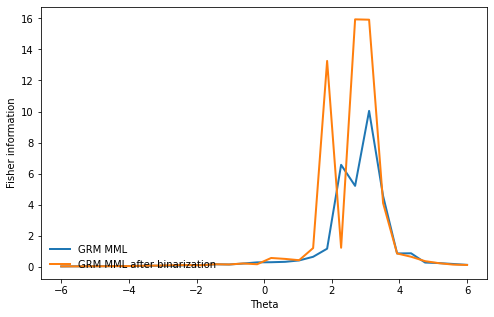

In [44]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 5)

ax.plot(theta, inffi, linewidth=2.0, label='GRM MML')
ax.plot(theta, inffi_bin, linewidth=2.0, label='GRM MML after binarization')

ax.set_xlabel('Theta')
ax.set_ylabel('Fisher information')
ax.legend(loc='lower left', frameon=False)


plt.show()

In [45]:
inffi_bin_d = []

for t in theta:
    data = create_synthetic_irt_polytomous(diffi, 
                                           discr, 
                                           np.asarray([t]))
    
    maxval = max(data[0])
    
    # Поляризация данных
    data[0] = np.array(list(map(lambda x: int(x == maxval), data[0])))

    estimates = twopl_mml(data)
        
    inffi_bin_d.append(
        1 / (rmse(estimates['Ability'], t) ** 2)
    )

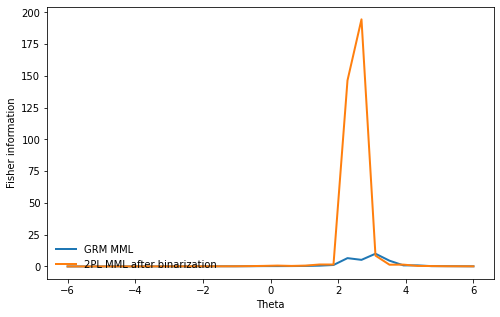

In [46]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 5)

ax.plot(theta, inffi, linewidth=2.0, label='GRM MML')
ax.plot(theta, inffi_bin_d, linewidth=2.0, label='2PL MML after binarization')

ax.set_xlabel('Theta')
ax.set_ylabel('Fisher information')
ax.legend(loc='lower left', frameon=False)


plt.show()

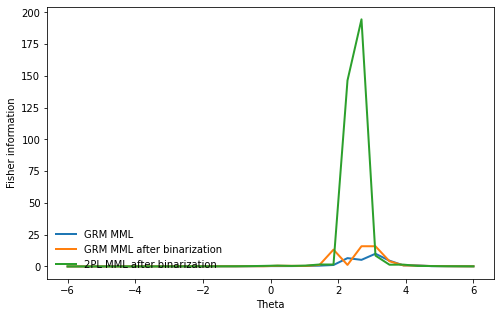

In [47]:
fig, ax = plt.subplots()

fig.set_size_inches(8, 5)

ax.plot(theta, inffi, linewidth=2.0, label='GRM MML')
ax.plot(theta, inffi_bin, linewidth=2.0, label='GRM MML after binarization')
ax.plot(theta, inffi_bin_d, linewidth=2.0, label='2PL MML after binarization')

ax.set_xlabel('Theta')
ax.set_ylabel('Fisher information')
ax.legend(loc='lower left', frameon=False)

plt.show()